# Assignment - 4
# Problem Statement: Customer Segmentation Analysis
## Problem Statement
## You own the mall and want to understand the customers who can quickly converge [Target Customers] so that the insight can be given to the marketing team and plan the strategy accordingly. Perform the below Tasks to complete the assignment:-
## Clustering the data and performing classification algorithms

## 2.Load the dataset into the tool.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

ds = pd.read_csv('Mall_Customers.csv')
ds


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
ds.drop('CustomerID',axis=1,inplace=True)

## 3. Perform Below Visualizations.
## i. Univariate Analysis


Frequency table for Age is given below
32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64



Mean, Median:

1-mean of age =  38.85
2-mean of height =  60.56
3-median value of length =  50.0

Chart

6-boxplot of Diameter


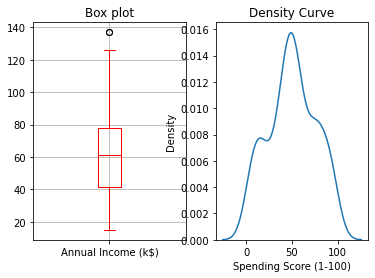

In [3]:
# univarient analysis

#frequency table for age

ft = ds['Age'].value_counts()

print("Frequency table for Age is given below")
print("{}\n\n\n".format(ft))

# mean

print("Mean, Median:\n")
ma=ds['Age'].mean() #mean of age
mh = ds['Annual Income (k$)'].mean() #mean of height
mel = ds['Spending Score (1-100)'].median() #median value of length



#chart

import matplotlib.pyplot as plt # library for plot or graph
import seaborn as sns

plt.subplot(1,2,1)
ch = ds.boxplot(column='Annual Income (k$)',grid=True,color ='red')
plt.title('Box plot')

plt.subplot(1,2,2)
DC = sns.kdeplot(ds['Spending Score (1-100)'])
plt.title('Density Curve')



print("1-mean of age = ",ma) 
print("2-mean of height = ",mh) 
print("3-median value of length = ",mel)#


print("\nChart\n\n6-boxplot of Diameter",flush=True)



## ii. Bi- Variate Analysis


Text(0, 0.5, 'Spending_Score(1-100)')

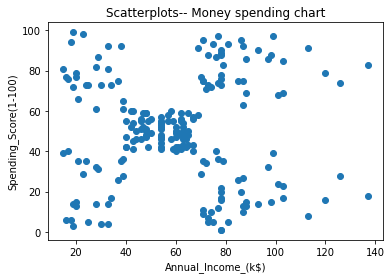

In [4]:
import matplotlib.pyplot as plt # library for charts

ds.set_axis(['Gender', 'Age', 'Annual_Income_(k$)','Spending_Score(1-100)'], axis='columns', inplace=True)
s = ds['Annual_Income_(k$)']
v = ds['Spending_Score(1-100)']

plt.scatter(s,v)
plt.title('Scatterplots-- Money spending chart')
plt.xlabel("Annual_Income_(k$)")
plt.ylabel("Spending_Score(1-100)")





In [5]:
ds.corr()

,Age,Annual_Income_(k$),Spending_Score(1-100)
Age,1.000000,-0.012398,-0.327227
Annual_Income_(k$),-0.012398,1.000000,0.009903
Spending_Score(1-100),-0.327227,0.009903,1.000000


In [6]:
import statsmodels.api as sm
# response variable
q = ds['Annual_Income_(k$)']

# explanatory variable
w = ds[['Spending_Score(1-100)']]

#add constant to predictor variables
w = sm.add_constant(w)

#fit linear regression model
model = sm.OLS(q, w).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Annual_Income_(k$)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.01942
Date:                Thu, 03 Nov 2022   Prob (F-statistic):              0.889
Time:                        14:22:23   Log-Likelihood:                -936.92
No. Observations:                 200   AIC:                             1878.
Df Residuals:                     198   BIC:                             1884.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    60.05

## iii. Multi-Variate Analysis

/home/lokesh/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lokesh/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lokesh/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lokesh/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


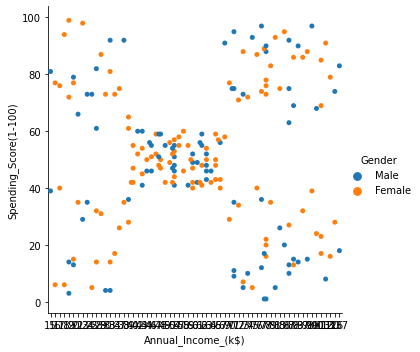

In [7]:
import matplotlib.pyplot as plt

plt=sns.catplot(x="Annual_Income_(k$)",y="Spending_Score(1-100)",hue="Gender",kind="swarm",data=ds)
print(plt)

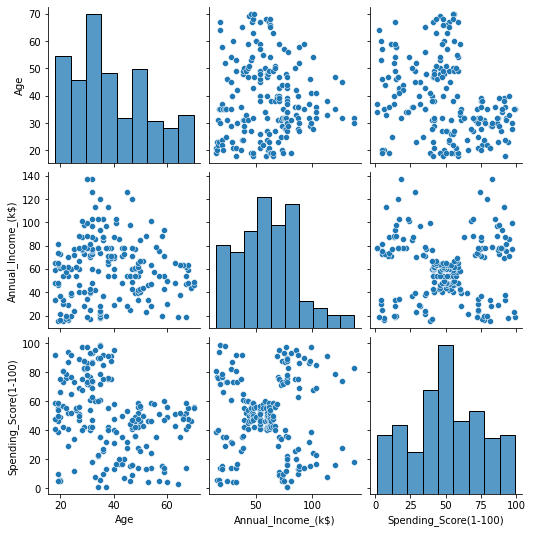

In [8]:
sns.pairplot(ds)

## 4. Perform descriptive statistics on the dataset.


In [14]:
ds.describe()

,Age,Annual_Income_(k$),Spending_Score(1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## 5. Check for Missing values and deal with them.

In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 200 non-null    object
 1   Age                    200 non-null    int64 
 2   Annual_Income_(k$)     200 non-null    int64 
 3   Spending_Score(1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [16]:
ds.isnull().sum()

Gender                   0
Age                      0
Annual_Income_(k$)       0
Spending_Score(1-100)    0
dtype: int64

In [17]:
ds.notnull()

,Gender,Age,Annual_Income_(k$),Spending_Score(1-100)
0,True,True,True,True
1,True,True,True,True
2,True,True,True,True
3,True,True,True,True
4,True,True,True,True
...,...,...,...,...
195,True,True,True,True
196,True,True,True,True
197,True,True,True,True
198,True,True,True,True


## 6. Find the outliers and replace them outliers

/home/lokesh/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income_(k$)'>

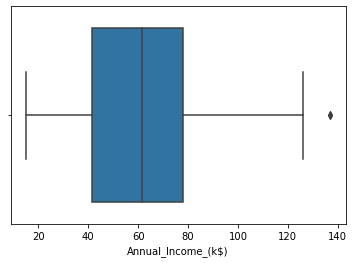

In [18]:
sns.boxplot(s)

/home/lokesh/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

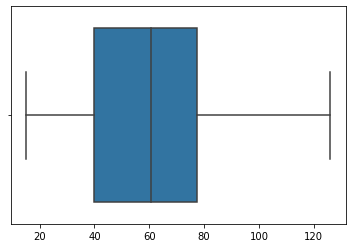

In [19]:
Q1= s.quantile(0.25)
Q3= s.quantile(0.75)

IQR=Q3-Q1   #spread the middle values are

upper_limit =Q3 + 1.5*IQR
lower_limit =Q1 - 1.5*IQR

s = np.where(s>upper_limit,30,s)

sns.boxplot(s)

## 7. Check for Categorical columns and perform encoding.

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

ds['Gender'] = le.fit_transform(ds['Gender'])
ds

        # 0 = female, 1 = male

,Gender,Age,Annual_Income_(k$),Spending_Score(1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## 8. Scaling the data

In [1]:
# In this dataset their is no need to Scaling the data

## 9. Perform any of the clustering algorithms

In [22]:
from sklearn.cluster import KMeans
km = KMeans()
clus = km.fit_predict(ds)
clus


array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 0, 4, 5, 1,
       5, 4, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7], dtype=int32)

In [26]:
clo = ds.columns
clo

Index(['Gender', 'Age', 'Annual_Income_(k$)', 'Spending_Score(1-100)'], dtype='object')

In [31]:
data1 = pd.DataFrame(ds,columns=clo)
data1


,Gender,Age,Annual_Income_(k$),Spending_Score(1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## 10. Add the cluster data with the primary dataset

In [33]:
data1['kclus'] = pd.Series(clus)

In [34]:
data1

,Gender,Age,Annual_Income_(k$),Spending_Score(1-100),kclus
0,1,19,15,39,5
1,1,21,15,81,4
2,0,20,16,6,5
3,0,23,16,77,4
4,0,31,17,40,5
...,...,...,...,...,...
195,0,35,120,79,7
196,0,45,126,28,6
197,1,32,126,74,7
198,1,32,137,18,6


##  11. Split the data into dependent and independent variables.

In [38]:
Y_split = data1.iloc[:,-1]

In [42]:
X_split = data1.iloc[:,0:4]

In [43]:
X_split

,Gender,Age,Annual_Income_(k$),Spending_Score(1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [39]:
Y_split

0      5
1      4
2      5
3      4
4      5
      ..
195    7
196    6
197    7
198    6
199    7
Name: kclus, Length: 200, dtype: int32

## 12. Split the data into training and testing

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_split,Y_split,train_size=0.80,random_state=1)

In [47]:
print(X_split.shape)
print(Y_split.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(200, 4)
(200,)
(160, 4)
(160,)
(40, 4)
(40,)


## 13. Build the Model

In [48]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(x_train,y_train)

LinearRegression()

In [67]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
prediction = model.predict(x_test)
prediction

array([1, 5, 5, 0, 6, 6, 1, 1, 4, 3, 2, 5, 4, 0, 0, 0, 2, 4, 3, 0, 1, 5,
       5, 1, 4, 3, 5, 5, 7, 1, 1, 2, 6, 2, 3, 1, 3, 0, 1, 3], dtype=int32)

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix,  classification_report
acc = accuracy_score(y_test,prediction)

In [79]:
acc

0.925

## 14. Train the Model

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

## 15. Test the Model

In [81]:
pred_test_rf = rf.predict(x_test)


In [82]:
pred_test_rf

array([1, 5, 5, 0, 6, 6, 1, 1, 4, 3, 2, 5, 4, 0, 0, 0, 2, 4, 3, 0, 1, 5,
       5, 1, 4, 3, 5, 5, 7, 1, 1, 2, 6, 2, 3, 1, 3, 0, 1, 3], dtype=int32)

## 16. Measure the performance using Evaluation Metrics.

In [83]:
accuracy_score(y_test,pred_test_rf)

0.925

In [84]:
confusion_matrix(prediction, y_test)

array([[6, 0, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 1, 1, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 6, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [1, 0, 0, 0, 0, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [85]:
confusion_matrix(pred_test_rf, y_test) #rf

array([[6, 0, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 1, 1, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 6, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [1, 0, 0, 0, 0, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

## by using Randomized SearchCV algorithm

In [89]:
from sklearn.model_selection import RandomizedSearchCV


In [90]:
parameters = {
    'n_estimators':[1,6,8,9,5,64,73,45,90,87,32,23,12,13],
    'criterion':['gini','entropy'],
    'max_depth':[2,5,4,7,8,9,10,20,50],
    'min_samples_split':[2,4,5,10,20]
}

In [91]:
rcv = RandomizedSearchCV(estimator=rf,param_distributions = parameters,cv =10 , n_iter = 10)

In [92]:
rcv.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 4, 7, 8, 9, 10, 20,
                                                      50],
                                        'min_samples_split': [2, 4, 5, 10, 20],
                                        'n_estimators': [1, 6, 8, 9, 5, 64, 73,
                                                         45, 90, 87, 32, 23, 12,
                                                         13]})>

In [93]:
rcv.fit(x_train,y_train)

/home/lokesh/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 4, 7, 8, 9, 10, 20,
                                                      50],
                                        'min_samples_split': [2, 4, 5, 10, 20],
                                        'n_estimators': [1, 6, 8, 9, 5, 64, 73,
                                                         45, 90, 87, 32, 23, 12,
                                                         13]})

In [94]:
rcv.best_params_

{'n_estimators': 73,
 'min_samples_split': 10,
 'max_depth': 20,
 'criterion': 'entropy'}

In [95]:
rcv.best_score_

0.96875

In [96]:
rf_tunned =RandomForestClassifier(n_estimators=73,min_samples_split=10,max_depth=20,criterion='entropy')
rf_tunned.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=10,
                       n_estimators=73)

In [98]:
pred_test_tunned =rf_tunned.predict(x_test)

In [99]:
accuracy_score(pred_test_tunned,y_test)

0.925

In [100]:
confusion_matrix(pred_test_tunned,y_test)

array([[6, 0, 0, 0, 0, 0, 0, 0],
       [0, 7, 0, 0, 1, 1, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 6, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [1, 0, 0, 0, 0, 6, 0, 0],
       [0, 0, 0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])



### store model into "rf_mdel.pkl"

In [101]:
import pickle
pickle.dump(rf,open("rf_mdel.pkl",'wb'))